In [1]:
import numpy as np
import pandas as pd

# P1 Carga y Limpieza de datos

### 1- . Carga

In [2]:
def obtener_semana(week):
    week = str(week)
    # Traemos los dataframe
    all_info = pd.read_csv('./data/raw/w'+week +
                           '/metrocuadrado_all_w'+week+'.csv')
    all_info.drop_duplicates(inplace=True)
    furnished = pd.read_csv('./data/raw/w'+week +
                            '/metrocuadrado_furnished_w'+week+'.csv')
    furnished.drop_duplicates(inplace=True)

    # Merge que identifica furnished dentro de all_info
    df = pd.merge(all_info, furnished, on=['property_type|rent_type|location', 'details', 'url', 'surface', 'price'],
                  how='outer', indicator=True)
    df.rename(columns={'n_rooms_x': 'n_rooms', 'n_bath_x': 'n_bath',
                       'metrocuadrado_index_x': 'metro_cuadrado'}, inplace=True)

    # Indices que solo hay en furnished
    indices = df[df._merge == 'right_only'].index
    for i in indices:
        df.loc[i, 'n_rooms'] = df.loc[i, 'n_rooms_y']
        df.loc[i, 'n_bath'] = df.loc[i, 'n_bath_y']
        df.loc[i, 'metro_cuadrado'] = df.loc[i, 'metrocuadrado_index_y']

    # Dropeamos los _y
    df.drop(['n_rooms_y', 'n_bath_y', 'metrocuadrado_index_y'],
            axis=1, inplace=True)

    # Dropeamos los duplicados y reseatmos indice
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [3]:
def append_dataframes():
    week_list = range(13, 18)
    df = pd.DataFrame()

    for week in week_list:
        df = df.append(obtener_semana(week))

    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [4]:
# Iniciar Data frame
df = append_dataframes()
df

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metro_cuadrado,_merge
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,left_only
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,left_only
5,"Casa en Arriendo, TIBABUYES Bogotá D.C..",$1.100.000,3,2,69.0 m2,"Casa en conjunto cerrado, recién remodelada, c...",https://www.metrocuadrado.com/inmueble/arriend...,32.4,left_only
6,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,4,4,71.0 m2,casa ezquinera tres niveles excelente ubicacio...,https://www.metrocuadrado.com/inmueble/arriend...,60.9,left_only
7,"Casa en Arriendo, PORTALES DEL NORTE Bogotá D.C..",$1.400.000,4,2,82.0 m2,casa en conjunto cerrado consta de tres pisos ...,https://www.metrocuadrado.com/inmueble/arriend...,52.9,left_only
8,"Casa en Arriendo, URBANIZACION BOLIVIA ORIENTA...",$1.200.000,3,2,72.0 m2,Cómoda casa en sector residencial de Ciudadela...,https://www.metrocuadrado.com/inmueble/arriend...,40.9,left_only
9,"Casa en Arriendo, URBANIZACION AZAFRANES Bogot...",$1.400.000,4,2,100.0 m2,Casa en arriendo de 2 niveles en La Isabela 2 ...,https://www.metrocuadrado.com/inmueble/arriend...,33.3,left_only


Si hay furnished que no hay en all, identificados como 'right_only' de la columna _merge

### 2- . Limpieza

##### a)

In [5]:
# Limpiamos la columna price
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace('.', '')
df['price'] = df['price'].apply(float)

In [6]:
# Limpiamos la columna surface
df['surface'] = df['surface'].str.replace('m2', '')
df['surface'] = df['surface'].apply(float)

In [7]:
# Limpiamos n_rooms y n_baths, sujeto a cambios
df['n_rooms'] = df['n_rooms'].replace('5+', 6)
df['n_rooms'].fillna(3, inplace=True)
df['n_rooms'] = df['n_rooms'].apply(float)

df['n_bath'] = df['n_bath'].replace('5+', 6)
df['n_bath'].fillna(3, inplace=True)
df['n_bath'] = df['n_bath'].apply(float)

Vemos los Dtype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16379 entries, 0 to 16378
Data columns (total 9 columns):
property_type|rent_type|location    16379 non-null object
price                               16379 non-null float64
n_rooms                             16379 non-null float64
n_bath                              16379 non-null float64
surface                             16379 non-null float64
details                             16269 non-null object
url                                 16379 non-null object
metro_cuadrado                      16379 non-null float64
_merge                              16379 non-null category
dtypes: category(1), float64(5), object(3)
memory usage: 1.0+ MB


##### b)

In [9]:
# Split de la comuna
s = pd.Series(df.keys())
split = s.str.split('|', expand=True)

# Columnas de transicion
df[['property_type+rent_type', 'location']] = df['property_type|rent_type|location'].str.split(',', expand=True)
df[['property_type','rent_type']] = df['property_type+rent_type'].str.split(' en ', expand=True)

# Dropeamos las extra
df = df.drop(['property_type|rent_type|location', 'property_type+rent_type'], axis=1)

### 3- . Creación de columnas indicadoras

#### a)

In [10]:
# Creamos columna precio m2
df['precio_m2'] = df['price']/df['surface']

#### b)

In [11]:
def num_garajes(url):
    url_splitted = url.split('-garajes')
    # Si no hacemos split
    if len(url_splitted) == 1:
        return 0
    else:
        # Agarramos las ultimos dos caracteres XX-garajes
        n = url_splitted[0][-2:]
        # Si es del tipo -1-garajes, devolvemos 1
        if n[0] == '-':
            return n[1]
        return n


# Creamos la columna n_garajes
df['n_garajes'] = df['url'].apply(num_garajes)

In [12]:
# Limpiamos n_garajes, sujeto a cambios
df['n_garajes'] = df['n_garajes'].replace('4+',5)
df['n_garajes'] = df['n_garajes'].apply(float)

### 4- . Clasificación por tipo de producto

In [13]:
# Inicializamos la columna tipo
df['tipo'] = -1


def clasifica_producto(df):
    # Areas
    area_min = [80, 120, 180, 240, 360, 40, 60, 80]
    area_max = [120, 180, 240, 360, 460, 60, 80, 120]

    # Query
    for tipo_prod in range(1, 9):
        minimo = area_min[tipo_prod-1]
        maximo = area_max[tipo_prod-1]
        # Query para tipos 1-5
        if tipo_prod < 6:
            query = 'property_type == "Casa" and {} < surface < {}'.format(minimo, maximo)
            indices = df.query(query).index
            for i in indices:
                df.loc[i, 'tipo'] = tipo_prod
        else:
            query = 'property_type == "Apartamento" and {} < surface < {}'.format(minimo, maximo)
            indices = df.query(query).index
            for i in indices:
                df.loc[i, 'tipo'] = tipo_prod

    return df


# Actualizamos el dataframe
df = clasifica_producto(df)

In [14]:
df

,price,n_rooms,n_bath,surface,details,url,metro_cuadrado,_merge,location,property_type,rent_type,precio_m2,n_garajes,tipo
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only,LA SOLEDAD NORTE Bogotá D.C..,Casa,Arriendo,1.666667e+04,1.0,-1
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,Casa,Arriendo,3.930000e+04,1.0,1
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,Casa,Arriendo,8.333333e+03,0.0,1
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,left_only,PARIS GAITAN Bogotá D.C..,Casa,Arriendo,4.788732e+04,0.0,-1
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,left_only,BALCONES DE ORIENTE Bogotá D.C..,Casa,Arriendo,1.625000e+04,1.0,1
5,1100000.0,3.0,2.0,69.0,"Casa en conjunto cerrado, recién remodelada, c...",https://www.metrocuadrado.com/inmueble/arriend...,32.4,left_only,TIBABUYES Bogotá D.C..,Casa,Arriendo,1.594203e+04,0.0,-1
6,3400000.0,4.0,4.0,71.0,casa ezquinera tres niveles excelente ubicacio...,https://www.metrocuadrado.com/inmueble/arriend...,60.9,left_only,PARIS GAITAN Bogotá D.C..,Casa,Arriendo,4.788732e+04,1.0,-1
7,1400000.0,4.0,2.0,82.0,casa en conjunto cerrado consta de tres pisos ...,https://www.metrocuadrado.com/inmueble/arriend...,52.9,left_only,PORTALES DEL NORTE Bogotá D.C..,Casa,Arriendo,1.707317e+04,1.0,1
8,1200000.0,3.0,2.0,72.0,Cómoda casa en sector residencial de Ciudadela...,https://www.metrocuadrado.com/inmueble/arriend...,40.9,left_only,URBANIZACION BOLIVIA ORIENTAL Bogotá D.C..,Casa,Arriendo,1.666667e+04,1.0,-1
9,1400000.0,4.0,2.0,100.0,Casa en arriendo de 2 niveles en La Isabela 2 ...,https://www.metrocuadrado.com/inmueble/arriend...,33.3,left_only,URBANIZACION AZAFRANES Bogotá D.C..,Casa,Arriendo,1.400000e+04,1.0,1


Hay que arreglar, hay casas con menos de 80 de surface

### 5- .

In [15]:
upz = pd.read_csv('./data/asignacion_upz/barrio-upz.csv')

In [16]:
def transforma_str(elemento):
    if type(elemento) == str:
        espaciado = elemento.strip()
        if len(espaciado) != 0:
            return elemento
    else:
        return '-nulo-'


upz['pro_location'] = upz['pro_location'].apply(transforma_str)
upz['pro_location'] = upz['pro_location'].apply(str.upper)
upz

,UPlCodigo,UPlTipo,UPlNombre,UPlArea,pro_location
0,UPZ100,1,GALERIAS,2.375681e+06,PALERMO
1,UPZ100,1,GALERIAS,2.375681e+06,BELALCAZAR
2,UPZ100,1,GALERIAS,2.375681e+06,SEARS
3,UPZ100,1,GALERIAS,2.375681e+06,GALERIAS
4,UPZ100,1,GALERIAS,2.375681e+06,BANCO CENTRAL
5,UPZ100,1,GALERIAS,2.375681e+06,EL CAMPIN
6,UPZ83,1,LAS MARGARITAS,1.472415e+06,SAN JOSE
7,UPZ83,1,LAS MARGARITAS,1.472415e+06,LAS MARGARITAS
8,UPZ107,1,QUINTA PAREDES,1.739560e+06,CENTRO NARIÑO
9,UPZ107,1,QUINTA PAREDES,1.739560e+06,GRAN AMERICA


In [17]:
# Inicializamos la columna
df['upz'] = -1

def clasifica_upz(df):
    locaciones = list(upz['pro_location'])
    codigos_upl = list(upz['UPlCodigo'])
    
    for codigo, locacion in zip(codigos_upl, locaciones):
        indice = df[df['location'].str.contains(locacion)].index
        
        for i in indice:
            df.loc[i,'upz'] = codigo
    
    return df


df = clasifica_upz(df)

In [18]:
df.head(3)

,price,n_rooms,n_bath,surface,details,url,metro_cuadrado,_merge,location,property_type,rent_type,precio_m2,n_garajes,tipo,upz
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only,LA SOLEDAD NORTE Bogotá D.C..,Casa,Arriendo,16666.666667,1.0,-1,UPZ101
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,Casa,Arriendo,39300.000000,1.0,1,-1
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,Casa,Arriendo,8333.333333,0.0,1,UPZ75


In [19]:
print('Porcentaje de objetos con código UPZ')
len(df[df['upz'] != -1])/len(df) * 100

Porcentaje de objetos con código UPZ


91.88595152329202

### 6- .

In [20]:
est_poblacion = pd.read_csv('./data/estadisticas_upz/estadisticas_poblacion.csv')
est_poblacion.drop(columns = ['Unnamed: 0', 'nomupz'], inplace = True)
est_poblacion.head()

,upz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,UPZ11,68430,0.6,3.9,20.7,35.2,44.579934,17.931973
1,UPZ12,50037,1.8,16.7,9.1,54.7,36.279630,5.420442
2,UPZ13,102981,0.0,3.5,5.5,118.4,33.286852,3.250000
3,UPZ18,69961,0.4,7.2,9.4,42.7,36.465059,9.439051
4,UPZ19,121158,0.3,8.0,8.2,59.1,32.887202,5.406574


In [21]:
# Enriquecemos df con los datos de est_poblacion
df = df.merge(est_poblacion, on = 'upz',how = 'left')

In [22]:
ind_inseg = pd.read_csv('./data/estadisticas_upz/indice_inseguridad.csv')
ind_inseg = ind_inseg.rename(columns = {'UPlCodigo' : 'upz'})
ind_inseg.drop(columns=['UPlNombre2','Unnamed: 0'], inplace=True)
ind_inseg.head()

,upz,indice_inseguridad
0,UPZ100,0.671141
1,UPZ83,0.000000
2,UPZ107,2.318841
3,UPZ101,3.629032
4,UPZ91,13.537118


In [23]:
# Enriquecemos df con el indice de inseguridad
df = df.merge(ind_inseg, on = 'upz',how = 'left')

In [24]:
per_areas_verdes = pd.read_csv('./data/estadisticas_upz/porcentaje_areas_verdes.csv')
per_areas_verdes.head()

,Unnamed: 0,cod_upz,upz,areas_verdes_perc
0,0,51.0,Los Libertadores,58.196667
1,1,87.0,Tintal Sur,85.924848
2,2,1.0,Paseo de los Libertadores,83.966495
3,3,64.0,Monte Blanco,85.778144
4,4,29.0,Minuto de Dios,37.852289


In [25]:
per_areas_verdes.rename(columns={'upz': 'zona','cod_upz': 'upz'},inplace=True)
per_areas_verdes['upz'] = per_areas_verdes['upz'].astype(int)
per_areas_verdes['upz'] = per_areas_verdes['upz'].astype(str)
per_areas_verdes['upz'] = per_areas_verdes['upz'].apply(lambda num: 'UPZ'+num)
per_areas_verdes['upz'] = per_areas_verdes['upz'].apply(str.upper)
per_areas_verdes.drop(columns=['Unnamed: 0'],inplace=True)
per_areas_verdes.head()

,upz,zona,areas_verdes_perc
0,UPZ51,Los Libertadores,58.196667
1,UPZ87,Tintal Sur,85.924848
2,UPZ1,Paseo de los Libertadores,83.966495
3,UPZ64,Monte Blanco,85.778144
4,UPZ29,Minuto de Dios,37.852289


In [26]:
# Enriquecemos df con el porcentaje de areas verdes
df = df.merge(per_areas_verdes, on = 'upz',how = 'left')
df.head(3)

,price,n_rooms,n_bath,surface,details,url,metro_cuadrado,_merge,location,property_type,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,zona,areas_verdes_perc
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only,LA SOLEDAD NORTE Bogotá D.C..,Casa,...,19451.0,0.6,18.4,7.2,145.7,44.896230,5.281135,3.629032,Teusaquillo,6.563105
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,Casa,...,179732.0,0.4,1.2,14.5,45.4,31.113458,14.928786,0.310559,Fontibón,21.756250


In [27]:
df.replace(np.inf, np.nan,inplace=True)
df.replace(-np.inf, np.nan,inplace=True)
#df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16381 entries, 0 to 16380
Data columns (total 25 columns):
price                                      16381 non-null float64
n_rooms                                    16381 non-null float64
n_bath                                     16381 non-null float64
surface                                    16381 non-null float64
details                                    16271 non-null object
url                                        16381 non-null object
metro_cuadrado                             16381 non-null float64
_merge                                     16381 non-null category
location                                   16381 non-null object
property_type                              16381 non-null object
rent_type                                  16381 non-null object
precio_m2                                  16365 non-null float64
n_garajes                                  16381 non-null float64
tipo                                 

# P2

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

def estilo():
    sns.set_style('dark')
    sns.despine()

In [29]:
names = ['numeric', 'categorical']
# Se crea una lista con las columnas numericas
numeric = ['price', 'n_rooms', 'n_bath', 'surface', 'metro_cuadrado', 'precio_m2',
       'n_garajes', 'personas', 'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc',
       'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'adultos_mayores_pobres_perc', 'indice_inseguridad',
       'areas_verdes_perc'
]

# Se crea una lista con las columnas categoricas
categorical = list(set(df.columns) - set(numeric))


mapping = [('numeric', col) for col in numeric]
mapping.extend([('categorical', col) for col in categorical])
'''
Se reordenan las columnas del dataframe para que coincidan con el esquema 
del multi indice
'''

df = df.reindex(columns=numeric + categorical)

In [30]:
# Se reasignan las columnas
df.columns = pd.MultiIndex.from_tuples(mapping)

price
n_rooms
n_bath
surface
metro_cuadrado
precio_m2
n_garajes
personas
trabajoinf_ninos_5_17_anos_perc
trabajoinfampliado_ninos_5_17_anos_perc
jovenes_14_24_anos_nini_perc
indice_envegecimiento
jefe_mujer_perc
adultos_mayores_pobres_perc
indice_inseguridad
areas_verdes_perc


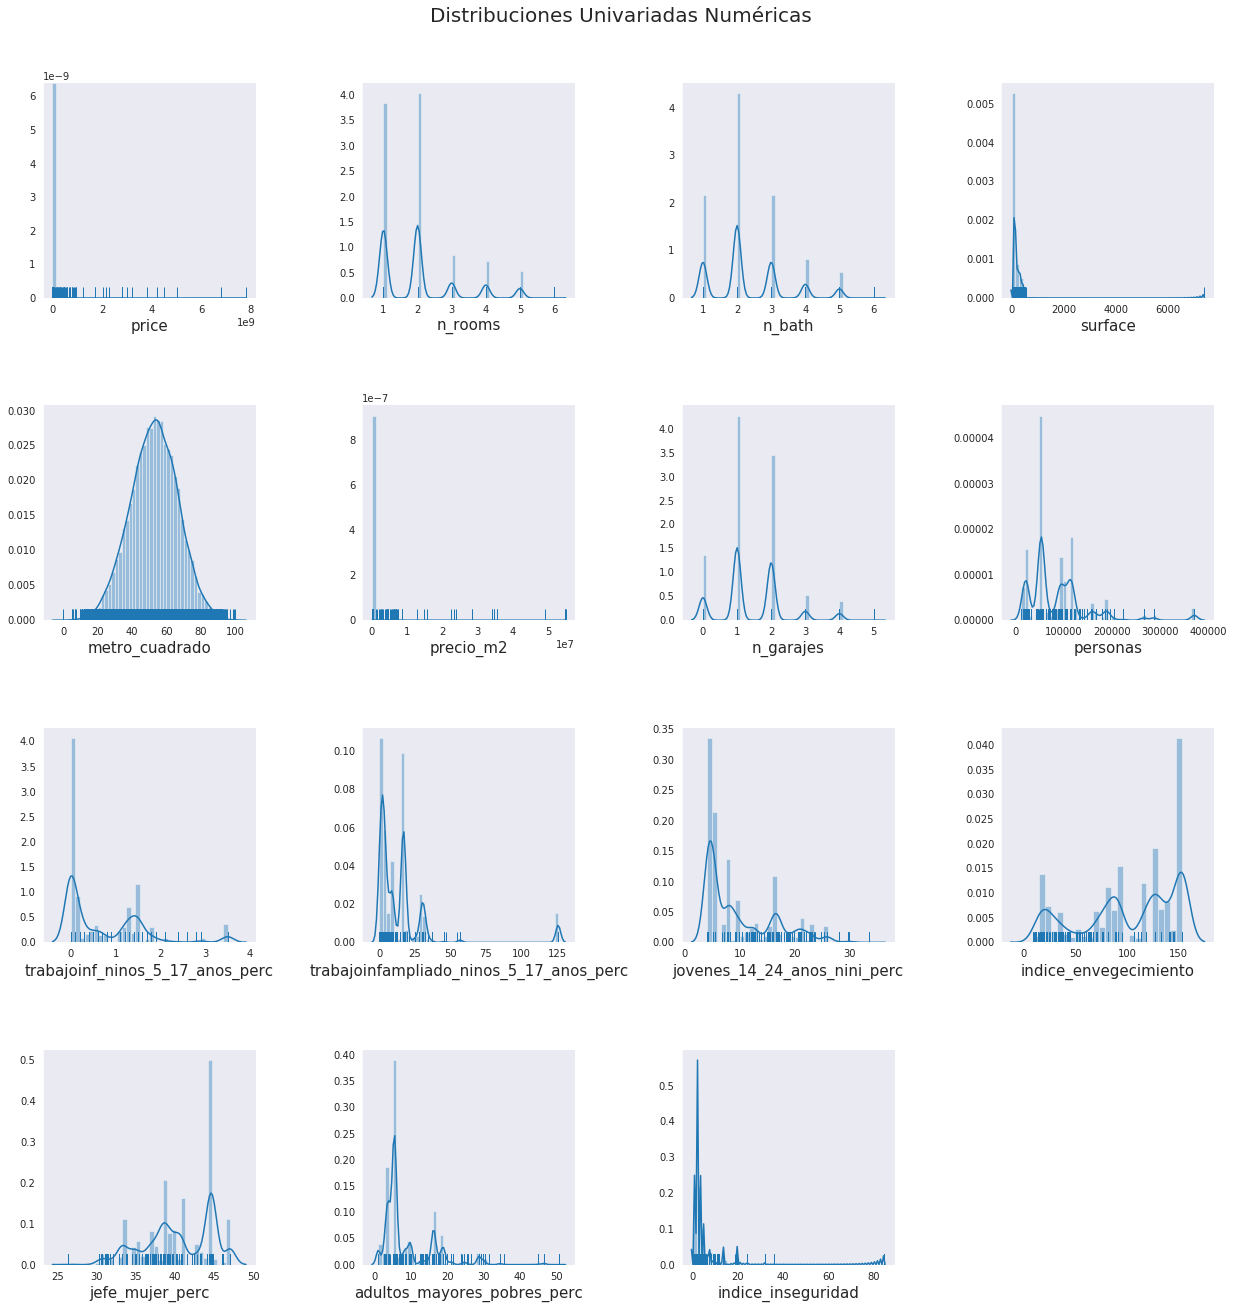

In [32]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=[17, 17])
estilo()

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    print(col)
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.5, 0.5)
plt.subplots_adjust(wspace=w, hspace=h)
plt.show()

In [43]:
# Datos faltantes
import missingno as msno
df.replace('nan',np.nan,inplace=True)
print('Valores nan')
print(df.isnull().sum())
print('Mayor info perdida')
print(df.isnull().sum().nlargest(10))

Valores nan
numeric      price                                         0
             n_rooms                                       0
             n_bath                                        0
             surface                                       0
             metro_cuadrado                                0
             precio_m2                                    16
             n_garajes                                     0
             personas                                   1329
             trabajoinf_ninos_5_17_anos_perc            1329
             trabajoinfampliado_ninos_5_17_anos_perc    1329
             jovenes_14_24_anos_nini_perc               1329
             indice_envegecimiento                      1329
             jefe_mujer_perc                            1329
             adultos_mayores_pobres_perc                1329
             indice_inseguridad                         1329
             areas_verdes_perc                          1329
categorical 

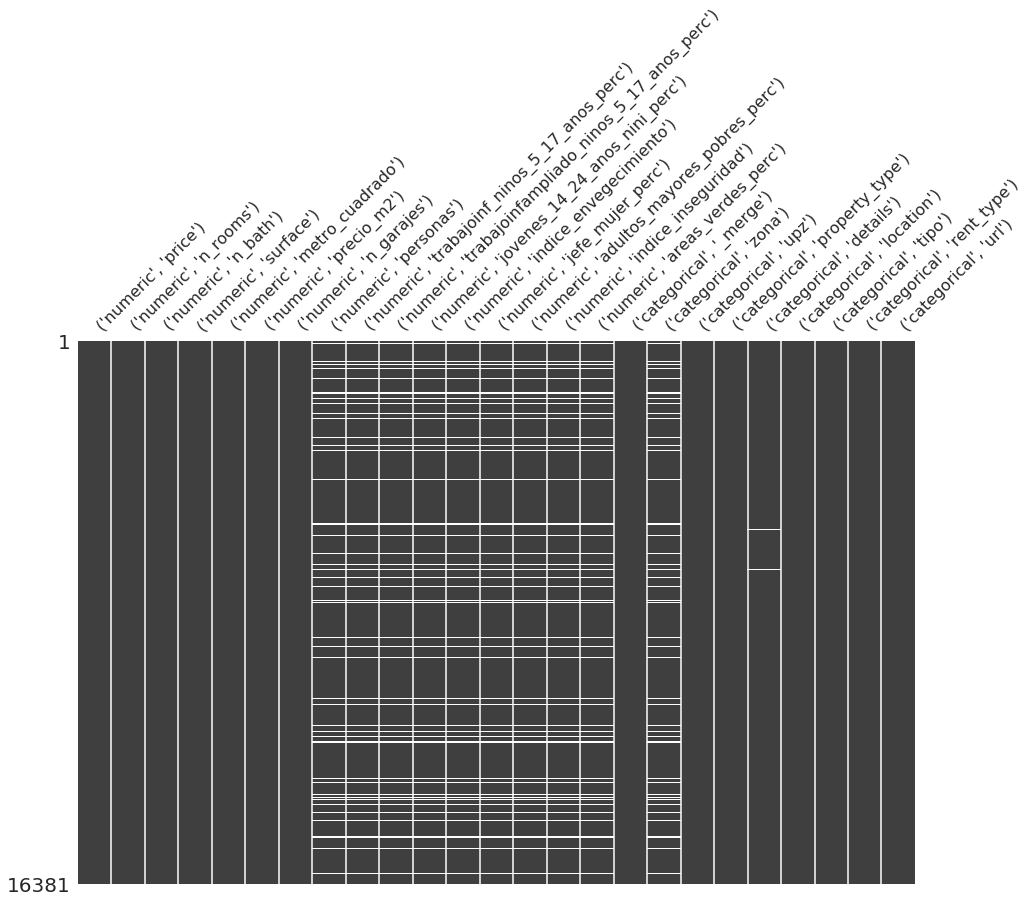

In [44]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=False)

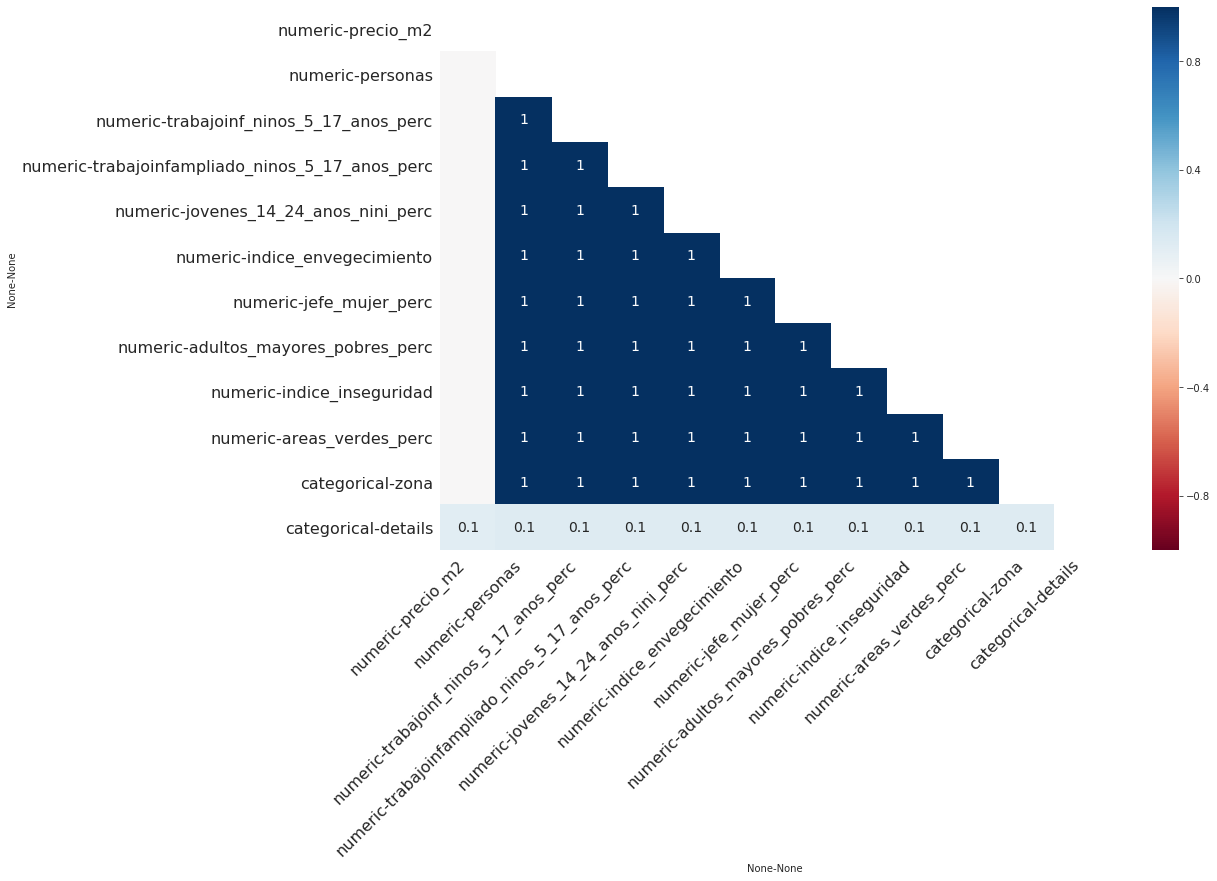

In [45]:
# Correlaciones de nulidad entre pares de variables
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df, ax = ax)

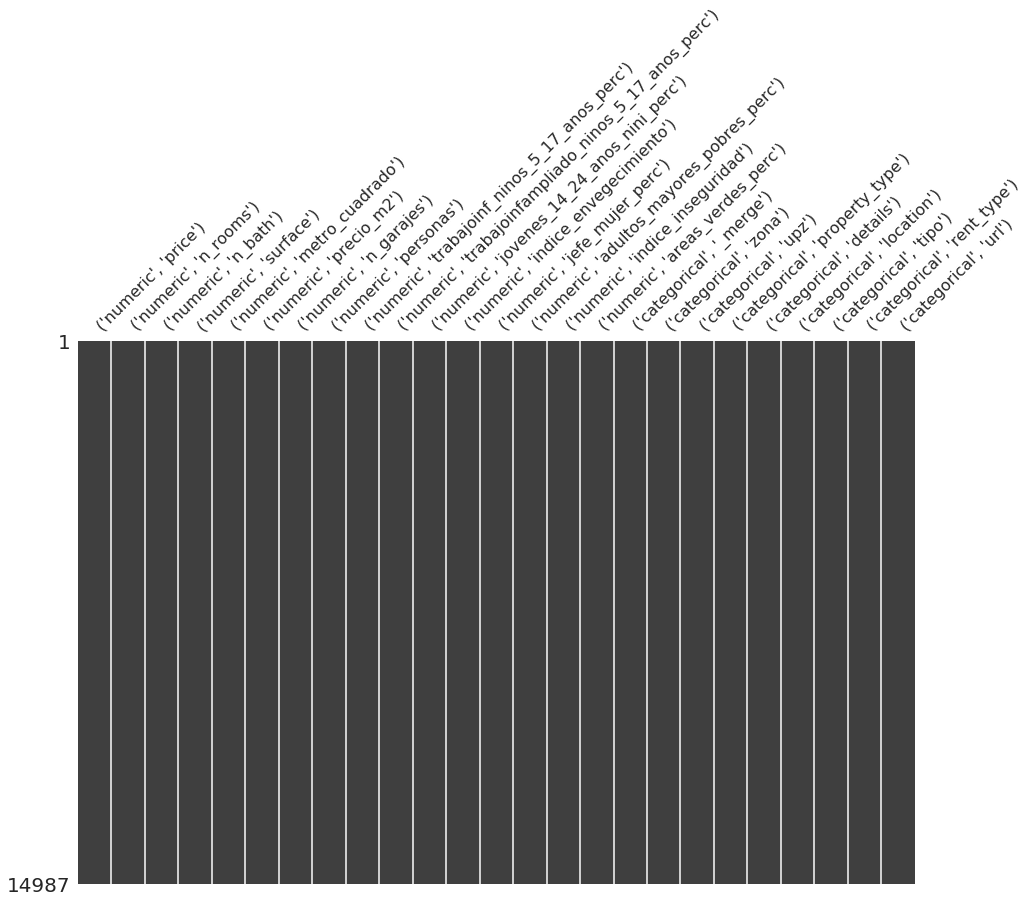

In [57]:
# dropear no mas
df1=df.copy()
df1.dropna(inplace=True)
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df1,ax = ax, sparkline=False)

In [55]:
df1=df.copy()
df1.dropna(inplace=True)
df1

numeric                                                      \
           price n_rooms n_bath surface metro_cuadrado     precio_m2   
0      1050000.0     3.0    2.0    63.0           25.6  16666.666667   
2       750000.0     3.0    1.0    90.0           12.2   8333.333333   
3      3400000.0     5.0    4.0    71.0           56.0  47887.323944   
4      1560000.0     4.0    3.0    96.0           47.1  16250.000000   
5      1100000.0     3.0    2.0    69.0           32.4  15942.028986   
6      3400000.0     4.0    4.0    71.0           60.9  47887.323944   
8      1200000.0     3.0    2.0    72.0           40.9  16666.666667   
9      1400000.0     4.0    2.0   100.0           33.3  14000.000000   
10     1393000.0     3.0    3.0    90.0           52.9  15477.777778   
11      578000.0     3.0    2.0    62.0           40.5   9322.580645   
12     2700000.0     2.0    2.0    90.0           55.9  30000.000000   
13     1300000.0     3.0    4.0    64.0           54.9  20312.500000   
14     1100000.0     3.0    2.0    79.0           35.1  13924.050633   
15      950000.0     2.0    1.0    70.0           54.3  13571.428571   
17     1250000.0     4.0    2.0    90.0           39.6  13888.888889   
18     4000000.0     4.0    2.0   100.0           65.8  40000.000000   
20     1158000.0     4.0    2.0    73.0           28.7  15863.013699   
21     1100000.0     3.0    2.0    72.0           19.5  15277.777778   
22     1100000.0     3.0    2.0    70.0           55.4  15714.285714   
24     1500000.0     3.0    2.0    90.0           28.7  16666.666667   
25     1200000.0     4.0    2.0    71.0           37.5  16901.408451   
26     1200000.0     3.0    3.0    90.0           67.3  13333.333333   
27     1200000.0     4.0    3.0    68.0           57.2  17647.058824   
28     2050000.0     2.0    3.0    90.0           34.0  22777.777778   
29     1150000.0     5.0    2.0    93.8           23.8  12260.127932   
30     1500000.0     4.0    2.0    71.0           36.9  21126.760563   
31     1280000.0     3.0    2.0    71.0           52.5  18028.169014   
32     1600000.0     4.0    2.0    70.0           46.6  22857.142857   
33     1300000.0     4.0    2.0    90.0           38.8  14444.444444   
34     1400000.0     3.0    2.0    80.0           57.5  17500.000000   
...          ...     ...    ...     ...            ...           ...   
16347  1300000.0     1.0    1.0    40.0           56.4  32500.000000   
16348  1550000.0     1.0    2.0    50.0           48.2  31000.000000   
16350  1050000.0     1.0    1.0    26.0           76.9  40384.615385   
16351  1700000.0     1.0    2.0    57.0           52.3  29824.561404   
16352  1870000.0     1.0    2.0    58.0           51.1  32241.379310   
16353   900000.0     1.0    1.0    31.0           50.7  29032.258065   
16354  1300000.0     1.0    1.0    60.0           36.3  21666.666667   
16355   980000.0     1.0    1.0    35.0           69.6  28000.000000   
16356   950000.0     1.0    1.0    31.0           73.7  30645.161290   
16357  1600000.0     1.0    1.0    41.0           69.6  39024.390244   
16358  1200000.0     1.0    1.0    47.0           76.4  25531.914894   
16359   920000.0     1.0    1.0    32.0           46.3  28750.000000   
16360  1650000.0     1.0    1.0    43.0           65.2  38372.093023   
16363  1350000.0     1.0    2.0    44.0           69.7  30681.818182   
16364  1150000.0     1.0    1.0    40.0           46.6  28750.000000   
16365  1700000.0     1.0    1.0    55.0           43.9  30909.090909   
16366  2300000.0     1.0    1.0    42.0           67.1  54761.904762   
16367  1500000.0     1.0    1.0    43.0           56.6  34883.720930   
16369  1100000.0     1.0    1.0    45.0           33.6  24444.444444   
16370   796550.0     1.0    1.0    35.0           41.6  22758.571429   
16371  1650000.0     1.0    1.0    54.0           64.5  30555.555556   
16372   974948.0     1.0    3.0    60.0           41.7  16249.133333   
16373  1550000.0     1.0    2.0    56.0          

In [101]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df_1=scaler.fit_transform(df1['numeric'])


pca=PCA(n_components=16)
pecea=pca.fit_transform(df_1)

kmeans=KMeans(n_clusters=5).fit(df1['numeric'])
centroids = kmeans.cluster_centers_
centroids[0]

#plt.plot(pecea[:,0],pecea[:,4],'o')
pecea.shape

(14987, 16)

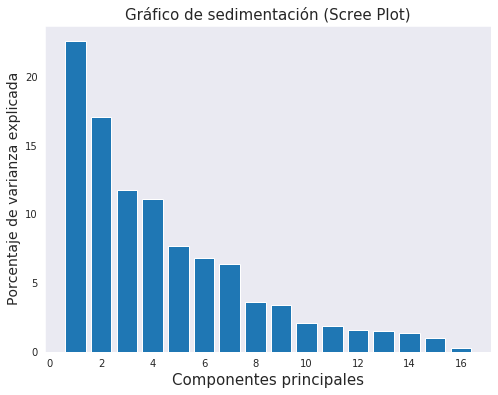

In [102]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.rcParams["figure.figsize"] = [8.0, 6.0]

#the following code makes a fancy looking plot using PC1 and PC2
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.ylabel('Porcentaje de varianza explicada',fontsize=14)
plt.xlabel('Componentes principales',fontsize=15)
plt.title('Gráfico de sedimentación (Scree Plot)',fontsize=15)
plt.show()